In [8]:
import torch 
from sklearn.datasets import make_blobs
from evaluate import * 
from training import * 
from loss import * 
from models import *
optuna.logging.set_verbosity(optuna.logging.WARNING)

# VICReg for dimensionality reduction: example 
In this example we use fake data with 10 classes and a high standard deviation (std = 5).<br>
We aim to perform dimensionality reduction while maintaining or improving cluster separabality

## Data loading

In [10]:
in_features = 100
out_features = 50
n_samples = 100 
data,labels = make_blobs(n_samples=n_samples, n_features=in_features, centers=10, cluster_std=5)
data = torch.tensor(data).float()

## Hyperparameter optimization and training 

In [13]:
config = {"Encoder":{"in_features":in_features,"out_features":out_features},
          "Projector":{"in_features":out_features,"out_features":(50,200,1)}, 
          "Model":{"loss":{"gamma":1,"epsilon":0.01,"lambda":(1,25,1),"mu":(1,25,1),"nu":1},
                   "batch_size":(5,20,1),"epochs":300},
          "Optimizer":{"lr":(0.001,0.1),"beta1":(0.9,0.99),"beta2":(0.96,0.99)}, 
         }

optimize = Optimize(model = EncoderProjectorModel, config = config, n_trials = 30)
optimize.optimize(data = data)
optimize.training_on_best_params(data = data)
embeddings_1, embeddings_2, _, _ = optimize.predict(data = data)

Elapsed time:  54.37 seconds
N params =  18464


## Embeddings evaluation 
We increased cluster separability in both PCA and original space.

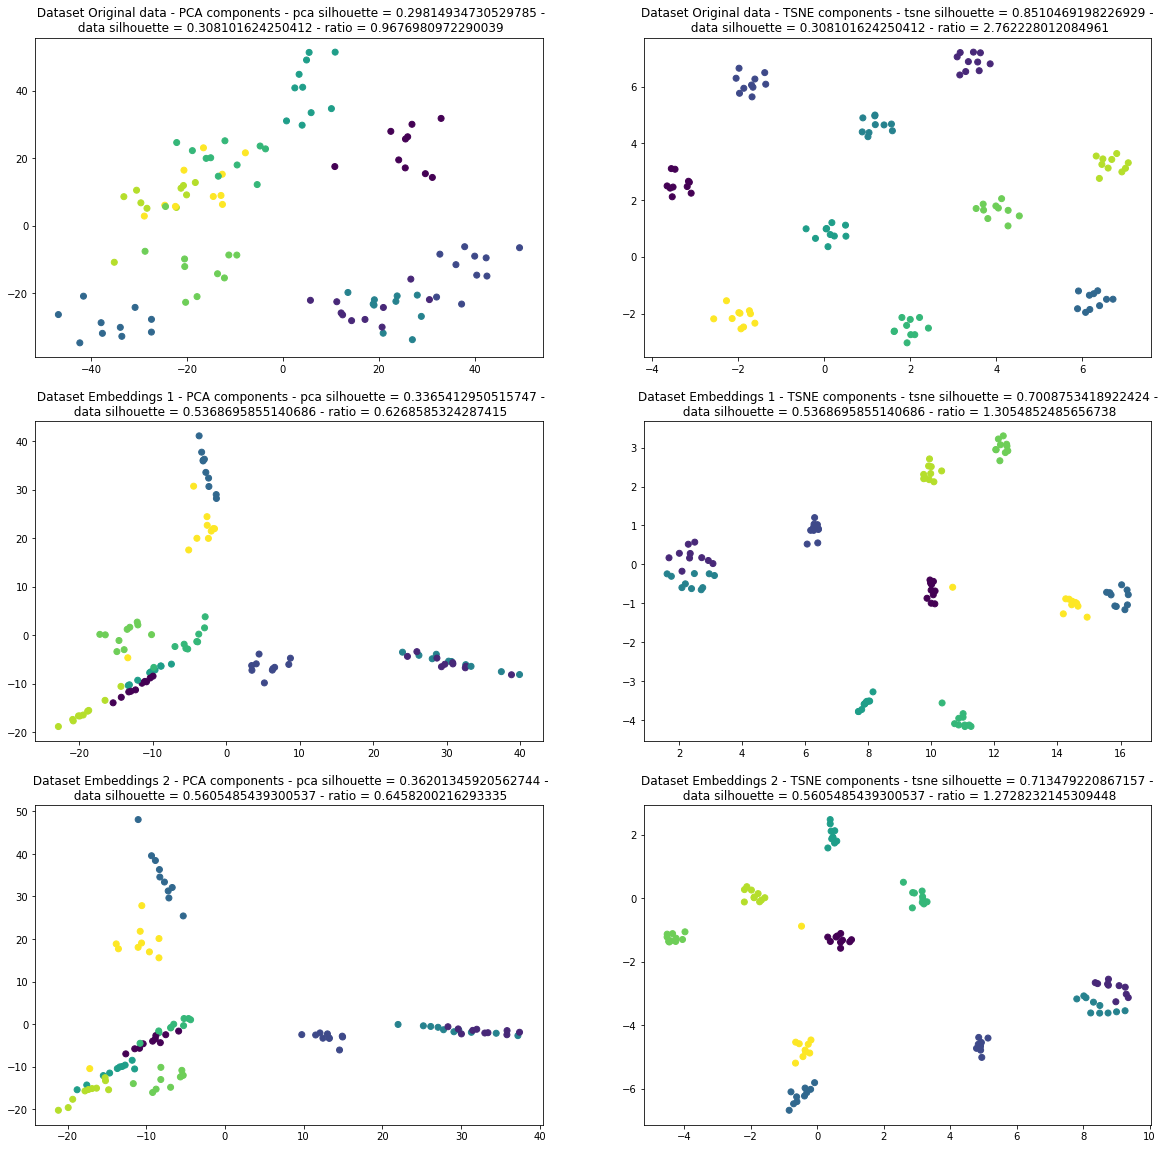

In [14]:
evaluate = Evaluate()
evaluate.compare_clustering(data = data, encoded_1 = embeddings_1, encoded_2 = embeddings_2, labels = labels)

